In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
plt.style.use('dark_background')

In [51]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [52]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values

文字データを0,1のタグに変換する処理。
sklearnkitのOneHotEncoderを用いて処理

In [53]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:,3] = labelencoder_X.fit_transform(X[:,3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

第一列をゼロとするため、削除

In [54]:
X = X[:, 1:]

In [55]:
pd.DataFrame(X).head()

,0,1,2,3,4
0,0.0,1.0,165349.20,136897.80,471784.10
1,0.0,0.0,162597.70,151377.59,443898.53
2,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,0.0,142107.34,91391.77,366168.42


In [56]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [58]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
y_pred = regressor.predict(X_test)

In [60]:
pd.DataFrame(np.c_[y_pred, y_test])

,0,1
0,103015.201598,103282.38
1,132582.277608,144259.40
2,132447.738452,146121.95
3,71976.098513,77798.83
4,178537.482211,191050.39
5,116161.242302,105008.31
6,67851.692097,81229.06
7,98791.733747,97483.56
8,113969.435330,110352.25
9,167921.065696,166187.94


In [61]:
import statsmodels.formula.api as sm

In [62]:
pd.DataFrame(X).head()

,0,1,2,3,4
0,0.0,1.0,165349.20,136897.80,471784.10
1,0.0,0.0,162597.70,151377.59,443898.53
2,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,0.0,142107.34,91391.77,366168.42


In [63]:
X = np.append(arr = np.ones((50,1)).astype(int), values = X, axis = 1)

In [64]:
pd.DataFrame(X).head()

,0,1,2,3,4,5
0,1.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,1.0,1.0,0.0,153441.51,101145.55,407934.54
3,1.0,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,1.0,0.0,142107.34,91391.77,366168.42


In [65]:
X_opt = X[:, [0,1,2,3,4,5]]

In [66]:
pd.DataFrame(X_opt).head()

,0,1,2,3,4,5
0,1.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,1.0,1.0,0.0,153441.51,101145.55,407934.54
3,1.0,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,1.0,0.0,142107.34,91391.77,366168.42


In [67]:
regressorOLS = sm.OLS(endog=y, exog=X_opt).fit()

In [68]:
regressorOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 05 Jun 2018   Prob (F-statistic):           1.34e-27
Time:                        20:40:21   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
X_opt = X[:, [0,3,4,5]]
regressorOLS = sm.OLS(endog=y, exog=X_opt).fit()
regressorOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 05 Jun 2018   Prob (F-statistic):           4.53e-30
Time:                        20:40:22   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
X_opt = X[:, [0,3,5]]
regressorOLS = sm.OLS(endog=y, exog=X_opt).fit()
regressorOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 05 Jun 2018   Prob (F-statistic):           2.16e-31
Time:                        20:40:22   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
X_opt = X[:, [0,3]]
regressorOLS = sm.OLS(endog=y, exog=X_opt).fit()
regressorOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 05 Jun 2018   Prob (F-statistic):           3.50e-32
Time:                        20:40:22   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [73]:
xdf = pd.DataFrame(X)
xdf[6] = pd.DataFrame(y)

In [74]:
xdf.head()

,0,1,2,3,4,5,6
0,1.0,0.0,1.0,165349.20,136897.80,471784.10,192261.83
1,1.0,0.0,0.0,162597.70,151377.59,443898.53,191792.06
2,1.0,1.0,0.0,153441.51,101145.55,407934.54,191050.39
3,1.0,0.0,1.0,144372.41,118671.85,383199.62,182901.99
4,1.0,1.0,0.0,142107.34,91391.77,366168.42,166187.94


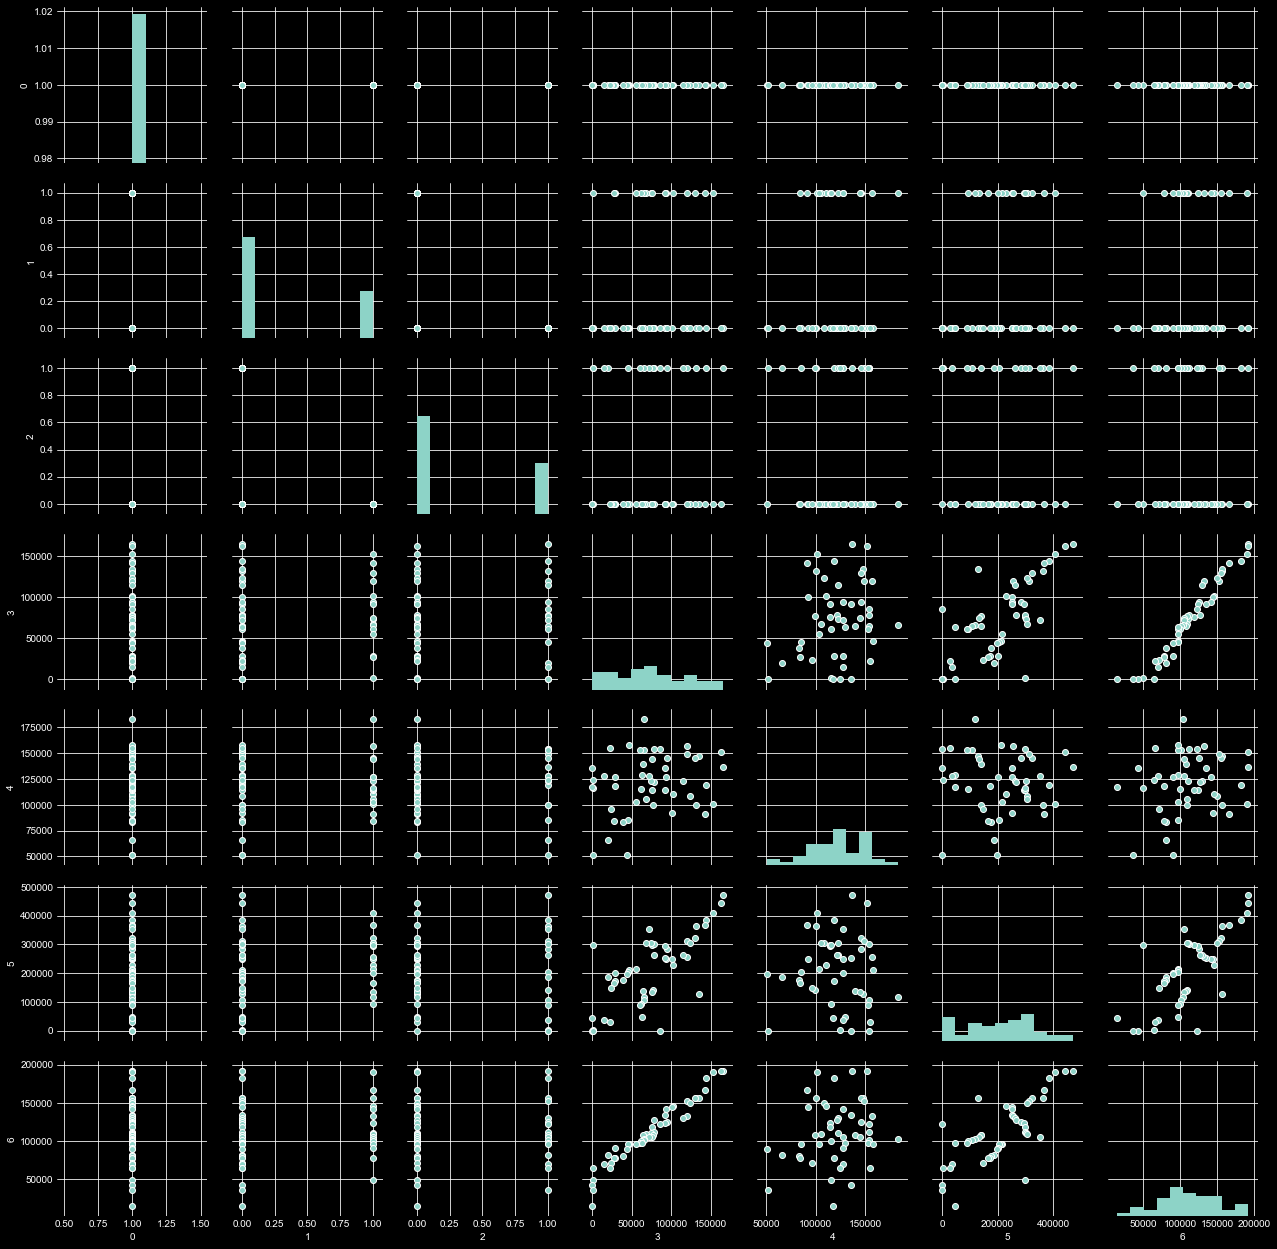

In [75]:
sns.pairplot(xdf)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X[:,1:], y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
np.mean((y_pred - y_test)**2) / 10000000

8.350286403257469

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X[:,[0,3]], y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
np.mean((y_pred - y_test)**2) / 10000000

6.847344071905931

Text(0.5,1,'Residual Plots')

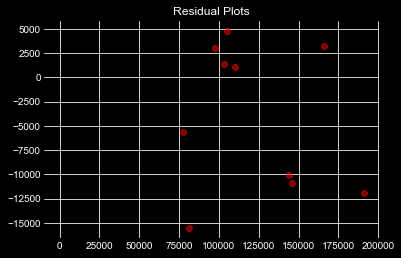

In [78]:
# テスト用のデータの残差プロットです。
test = plt.scatter(y_test,(y_pred-y_test),c='r',alpha=0.5)

# y=0の水平な線を描いておきます。
plt.hlines(y=0,xmin=-10,xmax=50)
plt.title('Residual Plots')

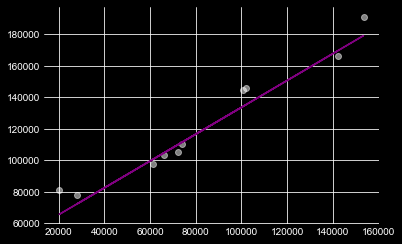

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_test[:,1], y_test, alpha = 0.5, color="White")
ax.plot(X_test[:,1], y_pred, color = "Purple")

In [80]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


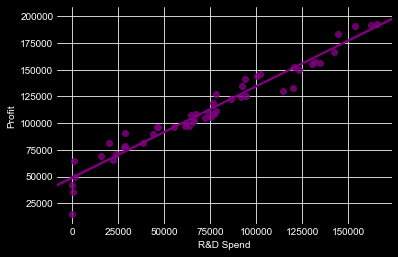

In [81]:
sns.regplot(x="R&D Spend", y="Profit", data=dataset, ci=50, color="Purple")

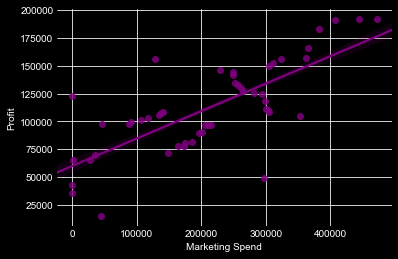

In [82]:
sns.regplot(x="Marketing Spend", y="Profit", data=dataset, ci=50, color="Purple")

In [83]:
exp = pd.read_csv("example.csv")

In [84]:
exp = exp.drop("Unnamed: 6", axis=1)

In [85]:
exp

,X1,Y1,X2,Y2,X3,Y3
0,1.996,2.672,1.471,-1.106,3.511,7.620
1,2.765,1.502,1.744,-1.112,2.273,6.813
2,3.645,1.226,2.409,-2.787,4.663,2.125
3,4.148,3.267,2.629,-0.943,5.228,8.641
4,4.984,3.525,3.440,-4.070,1.254,7.334
5,5.340,1.835,3.506,-1.680,6.444,0.520
6,5.535,3.317,4.123,-4.013,7.184,3.304
7,6.214,4.528,4.699,-2.282,1.026,7.918
8,6.621,3.199,4.704,-5.034,9.597,9.885
9,7.582,2.853,4.853,-2.234,4.197,2.764


In [86]:
exp['offset'] = 1

In [87]:
y_exp = exp['Y3']
x_exp = exp[['offset','X3']].values

In [88]:
regressorOLS = sm.OLS(endog=y_exp, exog=x_exp).fit()
regressorOLS.summary()

C:\Users\86002444\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y3   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.060
Method:                 Least Squares   F-statistic:                    0.1443
Date:                Tue, 05 Jun 2018   Prob (F-statistic):              0.710
Time:                        20:40:29   Log-Likelihood:                -38.267
No. Observations:                  16   AIC:                             80.53
Df Residuals:                      14   BIC:                             82.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2190      1.455      3.588      0.003       2.099       8.339
x1             0.0970      0.255      0.380      0.710      -0.451       0.644
==============================================================================
Omnibus:                        1.558   Durbin-Watson:                   2.254
Prob(Omnibus):                  0.459   Jarque-Bera (JB):                1.072
Skew:                          -0.366   Prob(JB):                        0.585
Kurtosis:                       1.964   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

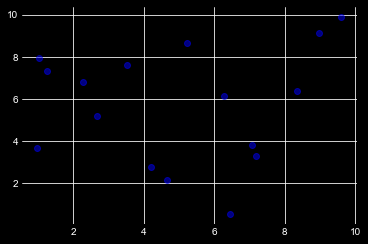

In [89]:
plt.scatter(x=exp['X3'], y=exp['Y3'],alpha = 0.5, color="Blue")

In [90]:
exp.corr()

,X1,Y1,X2,Y2,X3,Y3,offset
X1,1.000000,0.822217,0.982800,-0.749480,0.296782,-0.074506,NaN
Y1,0.822217,1.000000,0.858146,-0.628159,0.029014,0.083908,NaN
X2,0.982800,0.858146,1.000000,-0.719917,0.298873,-0.045941,NaN
Y2,-0.749480,-0.628159,-0.719917,1.000000,-0.122266,0.013125,NaN
X3,0.296782,0.029014,0.298873,-0.122266,1.000000,0.100997,NaN
Y3,-0.074506,0.083908,-0.045941,0.013125,0.100997,1.000000,NaN
offset,NaN,NaN,NaN,NaN,NaN,NaN,NaN
